<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22non_linear_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [131]:
data=pd.read_csv("https://raw.githubusercontent.com/JavohirJalilov/AI-Matplotlib/master/dataset/Yearly%20Population%20Growth%20Rate.csv")

In [132]:
data=np.array(data)
x=data[:,0]/1000
y=data[:,1]
x=torch.tensor(x,dtype=torch.float32).reshape(-1,1)
y=torch.tensor(y,dtype=torch.float32).reshape(-1,1)

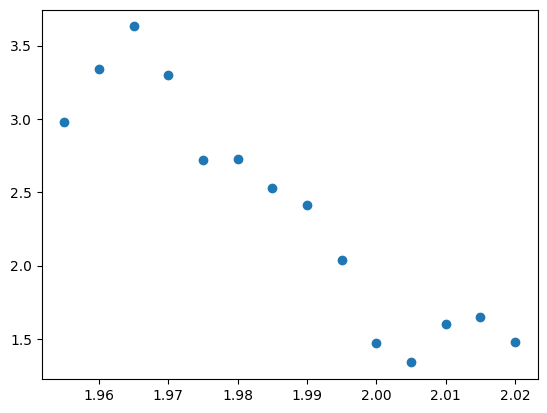

In [133]:
plt.scatter(x,y)

In [134]:
tren_x,test_x,tren_y,test_y=train_test_split(x,y,test_size=(0.3),random_state=True)

In [135]:
class Net(torch.nn.Module):
   def __init__(self, input=1, output=1):
       super().__init__()
       self.linear1 = torch.nn.Linear(in_features=1, out_features=20)
       self.linear2 = torch.nn.Linear(in_features=20, out_features=10)
       self.linear3 = torch.nn.Linear(in_features=10, out_features=1)
       self.activation =torch.nn.Sigmoid()

   def forward(self, x):
       x1 = self.linear1(x)
       x2 = self.linear2(x1)
       x2 = self.activation(x2)
       x3 = self.linear3(x2)

       return x3

In [136]:
net=Net()

In [137]:
criterion = torch.nn.MSELoss()
learningRate=0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learningRate)

In [138]:
epochs=1500
loss_data=[]
for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = net(tren_x)

    loss = criterion(y_hat, tren_y)
    loss_data.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch%100==0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 4.805782318115234
epoch 100, loss 0.4663044214248657
epoch 200, loss 0.466176837682724
epoch 300, loss 0.46607834100723267
epoch 400, loss 0.4658220112323761
epoch 500, loss 0.46495941281318665
epoch 600, loss 0.461001455783844
epoch 700, loss 0.4250456392765045
epoch 800, loss 0.27231156826019287
epoch 900, loss 0.12120968848466873
epoch 1000, loss 0.06453292816877365
epoch 1100, loss 0.04810814931988716
epoch 1200, loss 0.043015677481889725
epoch 1300, loss 0.049226194620132446
epoch 1400, loss 0.042539406567811966


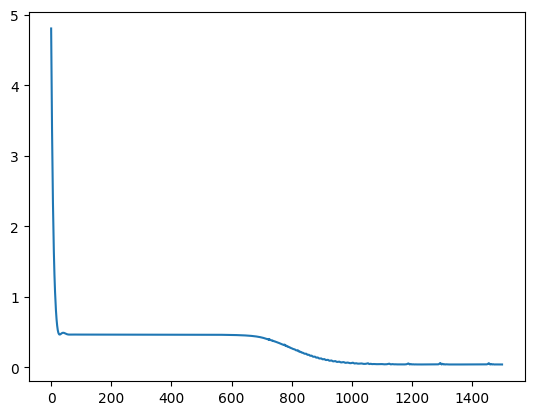

In [139]:
plt.plot(loss_data)

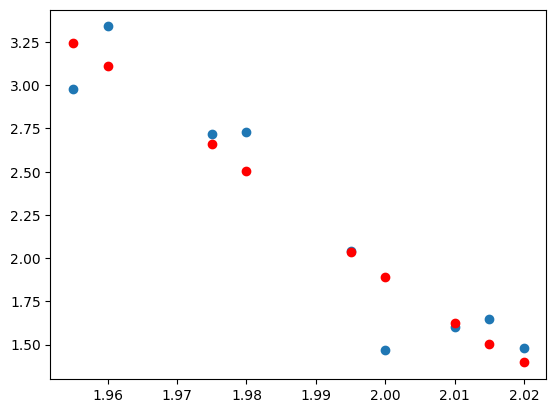

In [140]:
plt.scatter(tren_x,tren_y)
plt.scatter(tren_x,y_hat.detach().numpy(),c="r")

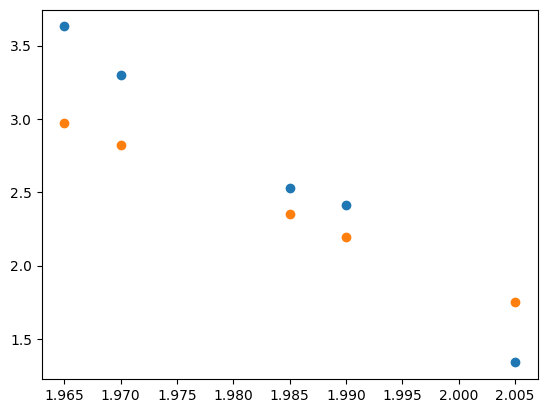

In [141]:
y_hat=net(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_hat.detach().numpy())

In [110]:
x = np.linspace(-10, 10, num=1000)
y = 0.1*x*np.cos(x) + 0.03*np.random.normal(size=1000)

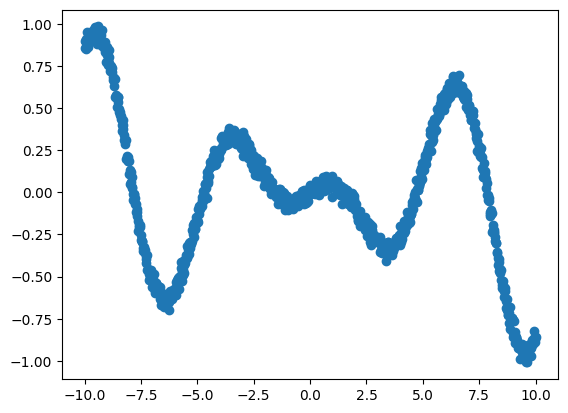

In [111]:
plt.scatter(x,y)

In [120]:
x = torch.tensor(x,dtype=torch.float32).reshape(-1,1)
y = torch.tensor(y,dtype=torch.float32).reshape(-1,1)

<ipython-input-120-29f37c193523>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x,dtype=torch.float32).reshape(-1,1)
<ipython-input-120-29f37c193523>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=torch.float32).reshape(-1,1)


In [121]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=(0.3),random_state=True)

In [122]:
class Net(torch.nn.Module):
   def __init__(self, input=1, output=1):
       super().__init__()
       self.linear1 = torch.nn.Linear(in_features=1, out_features=20)
       self.linear2 = torch.nn.Linear(in_features=20, out_features=10)
       self.linear3 = torch.nn.Linear(in_features=10, out_features=1)
       self.activation =torch.nn.Sigmoid()

   def forward(self, x):
       x1 = self.linear1(x)
       x2 = self.linear2(x1)
       x2 = self.activation(x2)
       x3 = self.linear3(x2)

       return x3

In [123]:
net = Net()

In [124]:
criterion = torch.nn.MSELoss()
learningRate=0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learningRate)

In [125]:
epochs=1500
loss_data=[]
for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = net(train_x)

    loss = criterion(y_hat, train_y)
    loss_data.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch%100==0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.22927890717983246
epoch 100, loss 0.1024821549654007
epoch 200, loss 0.005400477908551693
epoch 300, loss 0.004519572947174311
epoch 400, loss 0.004232948180288076
epoch 500, loss 0.004112460184842348
epoch 600, loss 0.004076491575688124
epoch 700, loss 0.004014689940959215
epoch 800, loss 0.003991489298641682
epoch 900, loss 0.003976648207753897
epoch 1000, loss 0.003975228406488895
epoch 1100, loss 0.003984699957072735
epoch 1200, loss 0.003929403144866228
epoch 1300, loss 0.003918811678886414
epoch 1400, loss 0.0039459578692913055


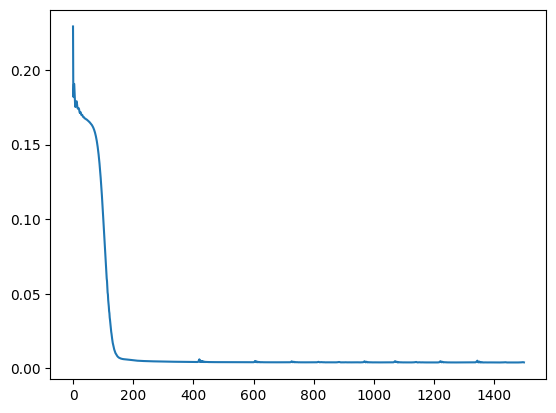

In [126]:
plt.plot(loss_data)

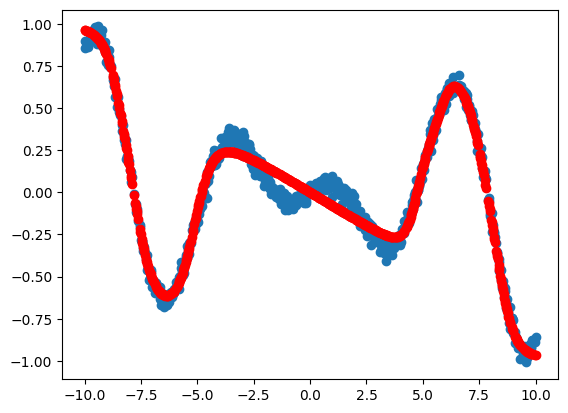

In [127]:
plt.scatter(tren_x,tren_y)
plt.scatter(tren_x,y_hat.detach().numpy(),c="r")

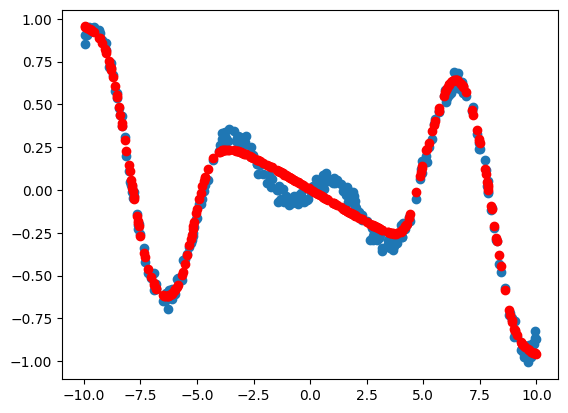

In [129]:
y_hat=net(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_hat.detach().numpy(),c="r")